<a href="https://colab.research.google.com/github/YigitBCesur/Pandas-Time-Series/blob/main/TS_II_The_ways_to_change_STRING_(date)_to_DATETIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[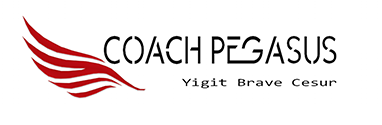](https://yigitbravecesur.com/)

### 🔗 Links


[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/yigitbcesur)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCYLMENl4ruLkZbCqLmIKW7A)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/YigitBraveCesur.svg?style=social&label=Follow%20%40YigitBraveCesur)](https://twitter.com/YigitBraveCesur)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

###Let's create a dataset

In [26]:
# Create a datetime index starting at 2022-01-03 with 100 values
index = pd.date_range(start='2022-01-03', periods=100, freq='D')

# Generate random values between 1 and 100
rand_values = np.random.randint(1, 101, size=100)

# Create a pandas DataFrame with the datetime index and random values
df = pd.DataFrame({'datetime': index, 'price1': rand_values , 'price2': rand_values})
#df = pd.DataFrame({'datetime': index, 'price2': rand_values})

# Print the pandas DataFrame
print(df)


     datetime  price1  price2
0  2022-01-03      20      20
1  2022-01-04      10      10
2  2022-01-05      34      34
3  2022-01-06      47      47
4  2022-01-07      58      58
..        ...     ...     ...
95 2022-04-08     100     100
96 2022-04-09      47      47
97 2022-04-10      14      14
98 2022-04-11      50      50
99 2022-04-12      27      27

[100 rows x 3 columns]


In [27]:
#@title Lets see type of Date column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  100 non-null    datetime64[ns]
 1   price1    100 non-null    int64         
 2   price2    100 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.5 KB


In [28]:
df.to_csv('data.csv', index=False)

**Method 1-  with READ parameters ----> parse dates , index_col**

In [29]:
df1=pd.read_csv('data.csv',parse_dates=['datetime'], index_col=['datetime'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2022-01-03 to 2022-04-12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price1  100 non-null    int64
 1   price2  100 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


**Method 2 :     to_datetime**

In [30]:
df2=df.copy()
df2.datetime

0    2022-01-03
1    2022-01-04
2    2022-01-05
3    2022-01-06
4    2022-01-07
        ...    
95   2022-04-08
96   2022-04-09
97   2022-04-10
98   2022-04-11
99   2022-04-12
Name: datetime, Length: 100, dtype: datetime64[ns]

In [31]:
pd.to_datetime(df2.datetime)

0    2022-01-03
1    2022-01-04
2    2022-01-05
3    2022-01-06
4    2022-01-07
        ...    
95   2022-04-08
96   2022-04-09
97   2022-04-10
98   2022-04-11
99   2022-04-12
Name: datetime, Length: 100, dtype: datetime64[ns]

In [32]:
df2=df2.set_index(pd.to_datetime(df2.datetime)).drop('datetime', axis=1)
display(df2)



,price1,price2
datetime,,
2022-01-03,20,20
2022-01-04,10,10
2022-01-05,34,34
2022-01-06,47,47
2022-01-07,58,58
...,...,...
2022-04-08,100,100
2022-04-09,47,47
2022-04-10,14,14


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2022-01-03 to 2022-04-12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price1  100 non-null    int64
 1   price2  100 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


**---------------------------------------------------------**

**Changing Datetime style**

Timestamp can not change ---- Timestamp degismiyor

In [40]:
pd.to_datetime('May 1 2001')

Timestamp('2001-05-01 00:00:00')

In [41]:
pd.to_datetime('2001 May  1')

Timestamp('2001-05-01 00:00:00')

In [42]:
pd.to_datetime('2001 1st May ')

Timestamp('2001-05-01 00:00:00')

In [43]:
pd.to_datetime(['2001-05-01','June 15th 2001'])

DatetimeIndex(['2001-05-01', '2001-06-15'], dtype='datetime64[ns]', freq=None)

In [44]:
pd.to_datetime(['2001-05-01','June 15th 2001', 'Elephant'], errors='coerce')

DatetimeIndex(['2001-05-01', '2001-06-15', 'NaT'], dtype='datetime64[ns]', freq=None)